In [1]:
# Import necessary libraries
import os
import math
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input, Conv2D, MaxPooling2D, InputLayer, ReLU

%matplotlib inline



In [2]:
# Downloading the data
!gdown 1sSNBEhRbV6bdspaDu8oq4vxOz7ddUCSI
!unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=1sSNBEhRbV6bdspaDu8oq4vxOz7ddUCSI
To: /content/data.zip
100% 12.8M/12.8M [00:00<00:00, 25.4MB/s]
Archive:  data.zip
  inflating: receptive_field_weights.h5  
   creating: cifar/
  inflating: cifar/img1.jpg          
  inflating: cifar/img10.jpg         
  inflating: cifar/img11.jpg         
  inflating: cifar/img12.jpg         
  inflating: cifar/img13.jpg         
  inflating: cifar/img14.jpg         
  inflating: cifar/img15.jpg         
  inflating: cifar/img16.jpg         
  inflating: cifar/img17.jpg         
  inflating: cifar/img18.jpg         
  inflating: cifar/img19.jpg         
  inflating: cifar/img2.jpg          
  inflating: cifar/img20.jpg         
  inflating: cifar/img21.jpg         
  inflating: cifar/img22.jpg         
  inflating: cifar/img23.jpg         
  inflating: cifar/img24.jpg         
  inflating: cifar/img25.jpg         
  inflating: cifar/img26.jpg         
  inflating: cifar/img27.jpg         
  inflatin

In [7]:
find_shape = np.array(image.load_img('cifar/img39.jpg'))
find_shape.shape

(32, 32, 3)

In [10]:
# Initialize a sequential model
model = Sequential()

# Add a convolution layer with 32 filters with kernel of size 3, relu activation, same padding
# Remember to find out the dimension of the input and send it as input_shape
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))

# Add a convolution layer with 32 filters with kernel of size 3, relu activation, same padding
model.add(Conv2D(32,3,activation='relu',padding='same'))

# Add a maxpooling layer with pool size of 2
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Add a convolution layer with 64 filters with kernel of size 3, relu activation, same padding
model.add(Conv2D(64,3,padding='same',activation='relu'))

# Add a convolution layer with 64 filters with kernel of size 3, relu activation, same padding
model.add(Conv2D(64,3,padding='same',activation='relu'))

# Add a maxpooling layer with pool size of 2
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Add a convolution layer with 128 filters with kernel of size 3, relu activation, same padding
model.add(Conv2D(128,3,activation='relu',padding='same'))

# Add a convolution layer with 128 filters with kernel of size 3, relu activation, same padding
model.add(Conv2D(128,3,activation='relu',padding='same'))

# Add a maxpooling layer with pool size of 2
model.add(MaxPooling2D((2,2),strides=2))

# Add a Flatten layer
model.add(Flatten())

# Add a fully connected dense layer with 1024 nodes and relu activation
model.add(Dense(1024,activation='relu'))

# Add a fully connected dense layer with 1024 nodes and relu activation
model.add(Dense(1024,activation='relu'))

# Add a dense layer for the output with 10 nodes and softmax activation
model.add(Dense(10,activation='softmax'))

# Compile the model with SGD optimizer with learning rate as 0.001 and momentum of 0.9
# Use categorical cross-entropy as the loss and accuracy as the metric
opt = SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
# Take a look at the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [15]:
# As training this model takes a long time, we have trained it for you 
# The pre-trained model weights are present in the file "receptive_field_weights.h5"
# Load these weights to skip the .fit step
model.load_weights('receptive_field_weights.h5')

# GETTING THE ACTIVATIONS

In [16]:
# Heler function to load the images given the file path
def load_image(img_path):

    img = image.load_img(img_path, target_size=(32, 32))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor = preprocess_input(img_tensor)               # imshow expects values in the range [0, 1]

    return img_tensor

In [30]:
# Path of the images folder
path = "cifar/"

# Get a list of all files within the path
dirs = os.listdir(path)

# Select a convolutional layer by specifying its number
layer_num = 8

# Select the activation map within the selected layer to see 
# its corresponding receptive field
activation_num = 128


In [18]:
# Get the output of the selected activation map using tensorflow backend
inp = model.input
outputs = [layer.output for layer in model.layers]
functors = [K.function([inp],[out]) for out in outputs]


In [52]:
functors

[<function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>,
 <function keras.backend.function.<locals>.func>]

In [55]:
# Initialize a list to store the output of the activation map for each image
acts = []

# Run a loop for the number of input images i.e.50
for i in range(1,51):
    
  # Define the image path of each image in the cifar folder
  file_path = path+"img"+str(i)+".jpg"

  # Call the load_image function defined for every image
  # above to get the images
  img_path = load_image(file_path)

  # Get the model layer output for the specific layer using functors got above
  layer_outs = [func(img_path) for func in functors]

  # Get the model output for the specific layer based on layer_num
  last = layer_outs[layer_num]

  # Get the set of feature maps of the selected layer
  feature_map = last[0]

  # Get the required feature maps out of the feature map set
  select_act = feature_map[0][:,:,activation_num-1]

  # Save the selected activation to a list
  acts.append(select_act.flatten())

In [56]:
# Find out which images activates which pixel of the feature map the most

# Initialize a dictionary to hold the pixel-wise image that activates it the most
best_img = {}

# Loop over the entire pixel space of the selected activation
# The dimension of the feature map can be got from model.layers[layer_num].output_shape
for j in range(model.layers[layer_num].output_shape[1]*model.layers[layer_num].output_shape[2]):
  # Define a list to store the activation of each image for a given pixel of the feature map  
  l = []
  for i in range(len(acts)):
    l.append(acts[i][j])
    
  # Get the image that activates a particular pixel of the activation map the most
  best_img[j] = np.argmax(l)+1



# SETUP THE PADDING, KERNEL AND STRIDES

In [57]:
# To get the receptive field we have computed the padding size, kernel size 
# and stride of each layer for the defined cnn model above

# Get the model padding, kernel and stride list
pad = [1,1,0,1,1,0,1,1,0]
ker = [3,3,2,3,3,2,3,3,2]
strd = [1,1,2,1,1,2,1,1,2]

# Helper function to get a dictionary that is of the following form
# [layer name]:{kernel, stride, padding}
def make_arch(model):
  c = 0
  arc_dict = {}
  for i in model.layers[:9]:
    l = []
    l.append(ker[c])
    l.append(strd[c])
    l.append(pad[c])
    c+=1
    arc_dict[i.name] = l
  return arc_dict

In [58]:
# Call the above defined make_arch function to get the dictionary required
arc_dict = make_arch(model)

In [59]:
# Helper class to compute the receptive field size and start

# To define a receptive field, we need the size of the receptive field
# and the position of the starting pixel

class ComputeReceptiveField():
    def calculate(self, architecture, input_image_size):
        arc = []
        input_layer = ('input_layer', input_image_size, 1, 1, 0.5)
        #self._print_layer_info(input_layer)
        arc.append(input_layer)
        for key in architecture:
            current_layer = self._calculate_layer_info(architecture[key], input_layer, key)
            input_layer = current_layer
            arc.append(current_layer)
        return arc
            
            
    def _calculate_layer_info(self, current_layer, input_layer, layer_name):
        n_in = input_layer[1]
        j_in = input_layer[2]
        r_in = input_layer[3]
        start_in = input_layer[4]
        
        k = current_layer[0]
        s = current_layer[1]
        p = current_layer[2]

        n_out = math.floor((n_in - k + 2*p)/s) + 1
        padding = (n_out-1)*s - n_in + k 
        p_right = math.ceil(padding/2)
        p_left = math.floor(padding/2)
        

        j_out = j_in * s
        r_out = r_in + (k - 1)*j_in
        start_out = start_in + ((k-1)/2 - p_left)*j_in
        return layer_name, n_out, j_out, r_out, start_out

In [60]:
# Create an object of the receptive field class
rf = ComputeReceptiveField()

# Call the calculate method of the receptive field class by passing the dictionary 
# created above and the input image size i.e. 32

# This method returns 4 values: 
# layer name, n[output size],j[cummulative stride] ,r[receptive field size], s[start]
com = rf.calculate(arc_dict, 32)


In [61]:
# Helper function to get the receptive field of the input image i.e. patch seen 
# by each pixel of the feature map

# The function takes the image, pixel position along x and y axis
# and the layer number
def get_rf(img, y_pix=0, x_pix=0, ln=7):

  # Get the layer_number  
  layer_num = ln

  # Get the start point i.e. the center pixel of the receptive field
  start = float(np.array(com[layer_num])[4]) + x_pix

  # Get the size of the receptive field
  rf = int(np.array(com[layer_num])[3])

  # Get the leftmost pixel of the receptive patch
  lt = start - math.ceil(rf/2) 

  # Get the rightmost pixel of the receptive patch
  rt = start + math.ceil(rf/2) 

  # Get the topmost pixel of the receptive patch
  top = start - math.ceil(rf/2) + y_pix

  # Get the bottom-most pixel of the receptive patch
  btm = start + math.ceil(rf/2) + y_pix

  # Clip the left pixel if it lower than 0
  if lt<0:
    lt=0

  # Clip the right pixel if it is higher than the max size of the input
  if rt>img[0].shape[0]:
    rt=img[0].shape[0]-1

  # Clip the top if it is lower than 0
  if top<0:
    top=0

  # Clip the bottom if it is higher than the max size of the input 
  if btm>img[0].shape[1]:
    btm=img[0].shape[1]-1

  # Get pixels corresponding to the receptive field from the input image
  img_rf = img[0][int(lt):int(rt), int(top):int(btm), :]

  # Return the receptive field of the pixel
  return img_rf


In [62]:
# Define a dictionary to store the receptive field associated to each pixel
rf_dict = {}

# Run a counter to use as dictionary keys
counter=0

# Loop over the possible pixel values of the feature map to get the receptive fiels
for i in range(model.layers[layer_num].output_shape[1]):
  for j in range(model.layers[layer_num].output_shape[2]):

    # Call the load_image function that is defined 
    # using the the best_img dictionary for each pixel
    img = load_image("cifar/img"+str(best_img[counter])+".jpg")

    # Call the get_rf function to get the receptive field for 
    # that pixel and the most activating image i.e img
    img_rf = get_rf(img, i, j, layer_num)

    # Save the returned receptive field as the values of the dictionary
    rf_dict[counter] = img_rf

    # Increment the counter
    counter+=1


Layer number: 8
Receptive field size:  32


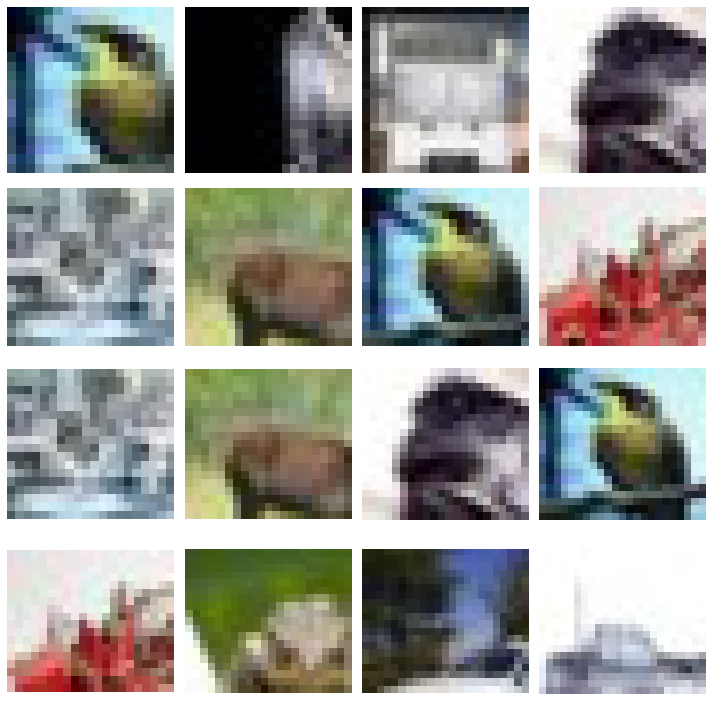

In [63]:
# Helper code to plot the receptive fields associated with each pixel

print("Layer number: "+str(layer_num))
print("Receptive field size: ", int(np.array(com[layer_num])[3]))

fig, ax = plt.subplots(model.layers[layer_num].output_shape[1], model.layers[layer_num].output_shape[2], figsize = (10,10))
counter = 0

# Loop over the possible pixel values of the feature map to plot the receptive fiels
for i in range(model.layers[layer_num].output_shape[1]):
  for j in range(model.layers[layer_num].output_shape[2]):

    # Denormalize the pixel values
    ax[i][j].imshow((rf_dict[counter]/2)+0.5)
    ax[i][j].axis('off')
    counter+=1
 
plt.tight_layout()
